# Exercises: Random Forest

<hr style="border:2px solid gray">

In [1]:
#standard DS imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sklearn imports
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

#custom imports
import prepare
import acquire

#filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')

Create a new notebook, random_forests, and work with titanic data to do the following:

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

<hr style="border:2px solid black">

<b>Acquire</b>

In [2]:
#bring in the data using our function from the acquire lesson
df = acquire.get_titanic_data()

In [3]:
#take a look at the data
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
#take a look at the datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


<b>Prepare</b>

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
The prepare function that we created in the prepare lesson does the following:
     <br>
    -- renames columns
     <br>
    -- drop unneeded and duplicate columns
     <br>
    -- imputes age with mean age
     <br>
    -- creates dummy variables
     <br>
    -- splits data
    </div>

In [5]:
#use our function from the prepare lesson to split and clean data
train, validate, test = prepare.prep_titanic_data(df)

In [6]:
#make sure our function worked
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [7]:
#take a look at the data
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_Q,embark_S
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


<b>Isolate the target variable</b>

In [8]:
# we know what our X and y are, let's be explicit about defining them
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = validate.drop(columns='survived')
y_val = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

<b>Create the baseline</b>

In [9]:
baseline = y_train.mode()

In [10]:
matches_baseline_prediction = y_train ==0

In [11]:
baseline_accuracy = matches_baseline_prediction.mean()

In [12]:
print(f"Baseline prediction: {(baseline[0])}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.62


### #1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [13]:
#create the model
forest1 = RandomForestClassifier(min_samples_leaf= 1, max_depth=10, random_state=123)

In [14]:
#fit the model
forest1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [15]:
#use the model
y_preds = forest1.predict(X_train)

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
    Usually set 1 to positive case and 0 to negative case
    </div>

<hr style="border:1.5px solid black">

### #2. Evaluate your results using the model score, confusion matrix, and classification report.

<b>Model Score</b>

In [31]:
#get our accuracy score for our first model
forest1.score(X_train, y_train)

0.9698795180722891

<b>Confusion Matrix</b>

In [17]:
cm = confusion_matrix(y_train, y_preds)
print(cm)

[[307   0]
 [ 15 176]]


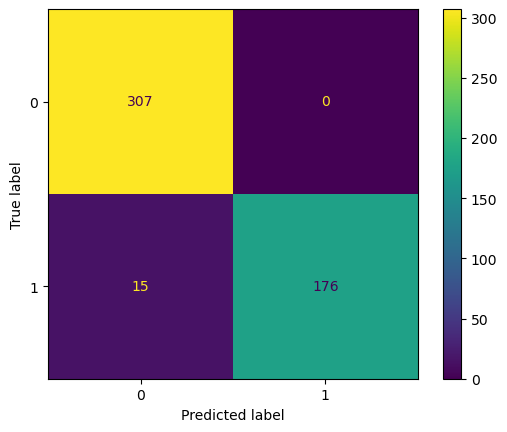

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest1.classes_)
disp.plot()

<b>Classification Report</b>

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
    <br>
    <br>
for classification_report we have to use 'y_preds' instead of 'forest1' because it requires an array and not a classifier!
</div>

In [36]:
report = classification_report(y_train, y_preds, output_dict=True)

print("Tree of depth 10")
pd.DataFrame(report)

Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.953416,1.000000,0.96988,0.976708,0.971283
recall,1.000000,0.921466,0.96988,0.960733,0.969880
f1-score,0.976153,0.959128,0.96988,0.967640,0.969623
support,307.000000,191.000000,0.96988,498.000000,498.000000


<hr style="border:1.5px solid black">

### #3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [20]:
#.ravel returns a contigious array
TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()
TN, FP, FN, TP

(307, 0, 15, 176)

In [37]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
print(f"Accuracy: {round(acc*100, 2)}")

# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
print(f"True Positive Rate: {round(TPR*100, 2)}")

# false positive rate
FPR = FP / (FP + TN)
print(f"False Positive Rate: {round(FPR*100, 2)}")

# true negative rate
TNR = TN / (TN + FP)
print(f"True Negative Rate: {round(TNR*100, 2)}")

# false negative rate
FNR = FN / (FN + TP)
print(f"False Negative Rate: {round(FNR*100, 2)}")

# precision
precision = TP / (TP + FP)
print(f"Precision: {round(precision*100, 2)}")

# f1
f1_score = 2 * (precision*recall) / (precision+recall)
print(f"F1 score: {round(f1_score*100, 2)}")

# support
support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 96.99
True Positive Rate: 92.15
False Positive Rate: 0.0
True Negative Rate: 100.0
False Negative Rate: 7.85
Precision: 100.0
F1 score: 95.91
Support (0): 191
Support (1): 307


In [22]:
# Let's use a for loop to compare the accuracy off different depths
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.810345    0.833333  0.817269    0.821839      0.819162
recall       0.918567    0.654450  0.817269    0.786509      0.817269
f1-score     0.861069    0.733138  0.817269    0.797103      0.812003
support    307.000000  191.000000  0.817269  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.833333    0.858974  0.841365    0.846154      0.843168
recall       0.928339    0.701571  0.841365    0.814955      0.841365
f1-score     0.878274    0.772334  0.841365    0.825304      0.837643
support    307.000000  191.000000  0.841365  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.840580    0.888889  0.855422    0.864734      0.859108
recall       0.944625    0.712042  0.855422    0.828334      0.855422
f1-score     

<div class="alert alert-block alert-success">
    <b>Takeaways:</b>
        <br>
        <br>
As we might expect, the more depth to the tree, the more the model fits to the training data        </div>

<hr style="border:1.5px solid black">

### #4. Run through steps increasing your ```min_samples_per_leaf``` and decreasing your ```max_depth```

In [23]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.923695,0.822430,0.101265
1,3,17,0.905622,0.822430,0.083193
2,4,16,0.889558,0.813084,0.076474
3,5,15,0.883534,0.794393,0.089142
4,6,14,0.875502,0.799065,0.076437
5,7,13,0.871486,0.794393,0.077093
6,8,12,0.873494,0.794393,0.079101
7,9,11,0.855422,0.794393,0.061029
8,10,10,0.859438,0.789720,0.069718
9,11,9,0.853414,0.785047,0.068367


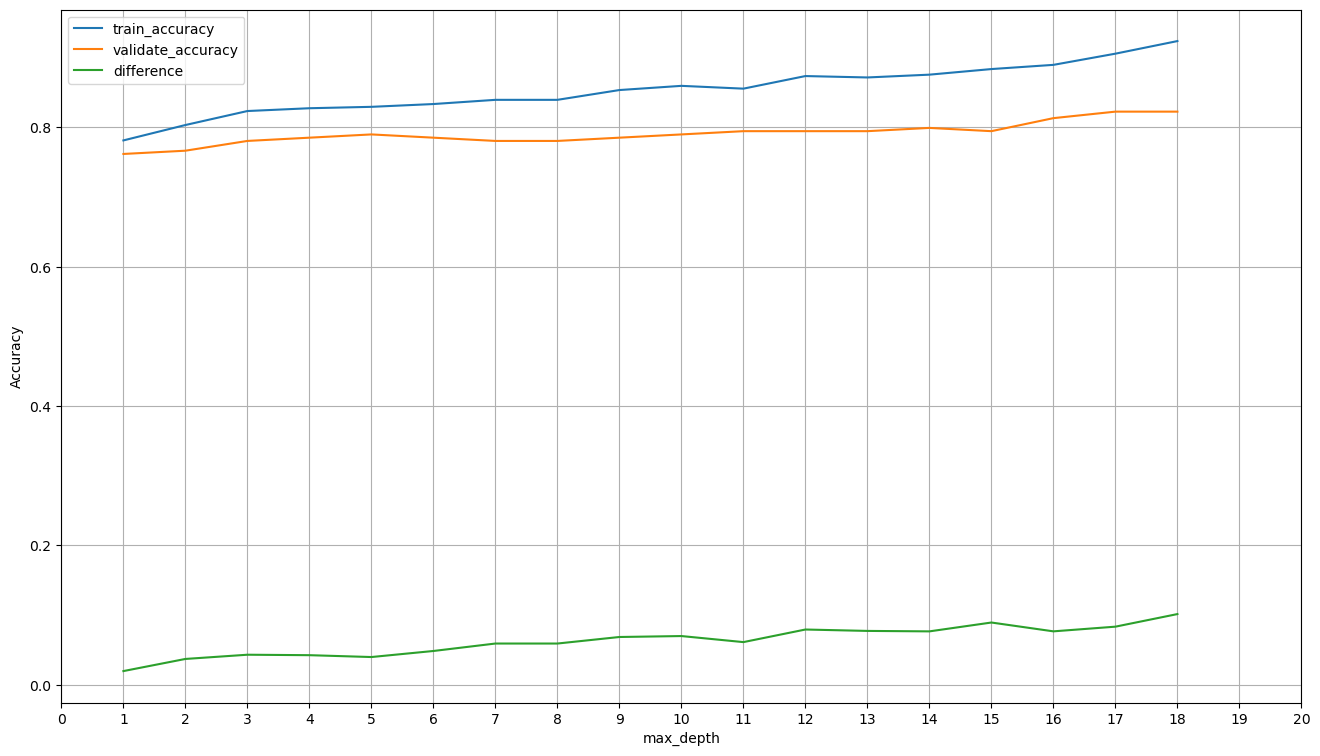

In [24]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### What if we increase both ```min_samples_per_leaf``` and ```max_depth```

In [25]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.817269,0.775701,0.041568
1,3,3,0.845382,0.785047,0.060335
2,4,4,0.847390,0.794393,0.052997
3,5,5,0.859438,0.799065,0.060372
4,6,6,0.869478,0.803738,0.065740
5,7,7,0.865462,0.789720,0.075742
6,8,8,0.861446,0.789720,0.071726
7,9,9,0.855422,0.789720,0.065702
8,10,10,0.859438,0.789720,0.069718
9,11,11,0.851406,0.785047,0.066359


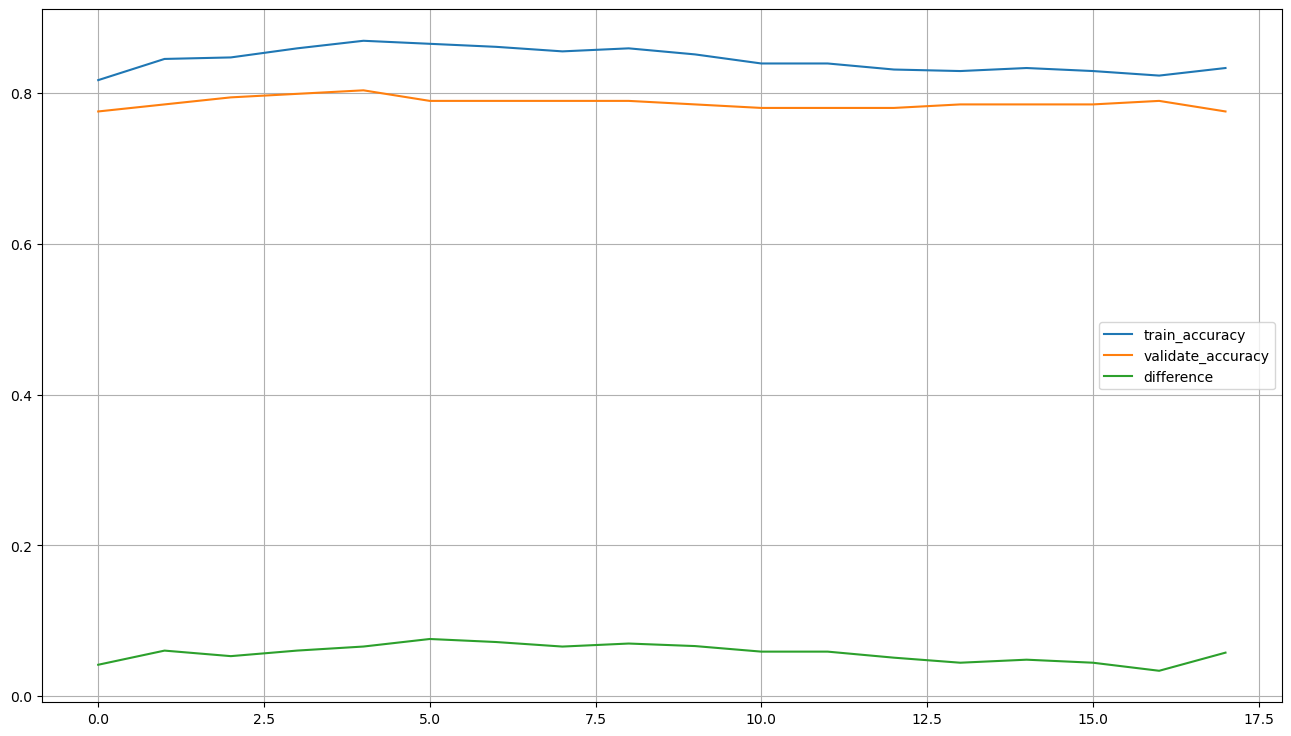

In [26]:
df[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

### What about a fixed depth and increasing ```min_samples_leaf```

In [27]:
metrics = []


for i in range(2, 25):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.883534,0.813084,0.070450
1,3,6,0.881526,0.803738,0.077788
2,4,6,0.871486,0.799065,0.072421
3,5,6,0.867470,0.794393,0.073077
4,6,6,0.869478,0.803738,0.065740
5,7,6,0.865462,0.789720,0.075742
6,8,6,0.859438,0.785047,0.074391
7,9,6,0.855422,0.789720,0.065702
8,10,6,0.857430,0.789720,0.067710
9,11,6,0.849398,0.785047,0.064351


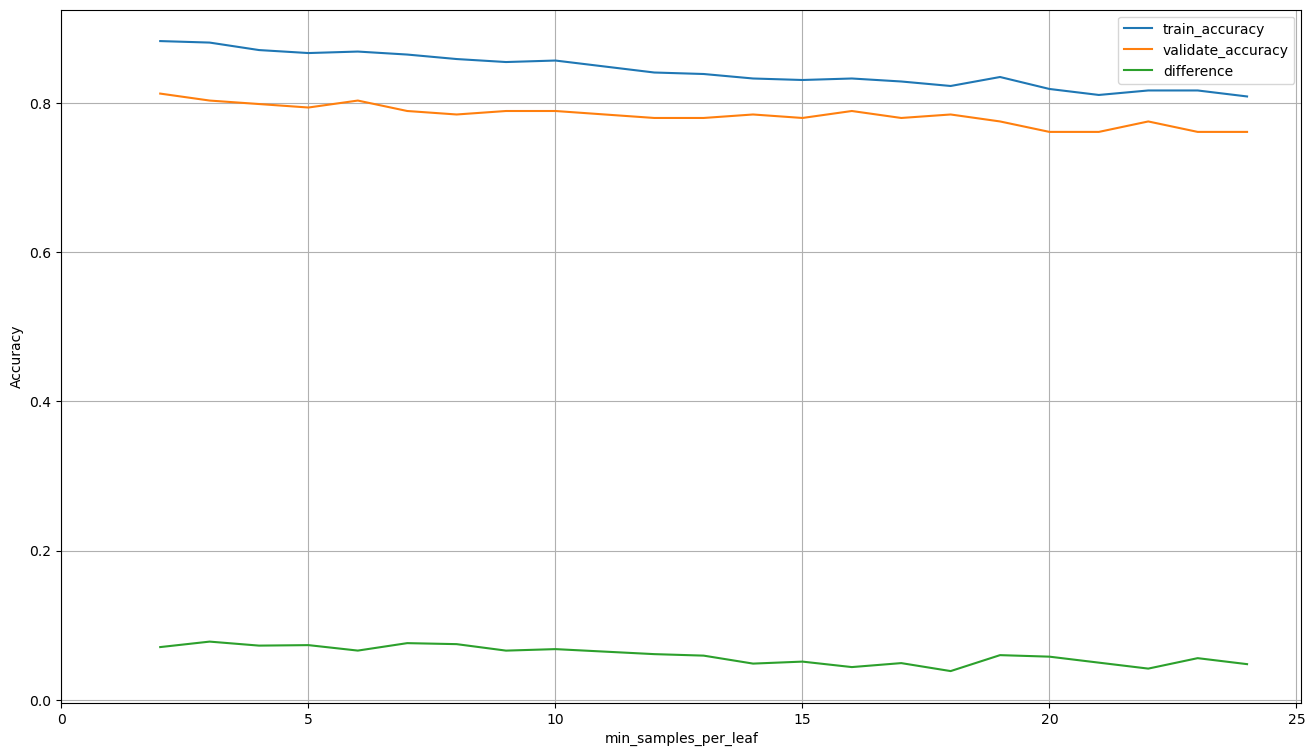

In [28]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,30,5))
plt.grid()

<hr style="border:1.5px solid black">

### #5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [29]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.817269,0.775701,0.041568
1,3,0.841365,0.785047,0.056319
2,4,0.855422,0.794393,0.061029
3,5,0.861446,0.808411,0.053035
4,6,0.893574,0.803738,0.089836
5,7,0.933735,0.817757,0.115978
6,8,0.945783,0.808411,0.137372
7,9,0.957831,0.803738,0.154093
8,10,0.969880,0.813084,0.156795
9,11,0.977912,0.817757,0.160155
